Question 2

In [ ]:
#(a)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
print(data.DESCR)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, 
                                                    test_size=0.3, 
                                                    random_state=50)

The value of d is 8 in this dataset

In [45]:
#(b)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=50)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Training MSE: 0.03561237258828922
Test MSE: 0.2643704261029829


The value of m is 8, because we use default hyperparameters, so the 
max_features is 8.

In [ ]:
#(c)
trees_mse = []
for tree in rf.estimators_:
    y_pred = tree.predict(X_test)
    trees_mse.append(mean_squared_error(y_test, y_pred))

print("MSE for Each Tree in the Test Set: ", trees_mse)
print("MSE for the Entire Forest on the Test Set: ", test_mse)

In [33]:
#(d)
import numpy as np
from scipy.stats import pearsonr

predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict(X_test))

correlations = []
for i in range(len(predictions)):
    for j in range(i+1, len(predictions)):
        corr, _ = pearsonr(predictions[i], predictions[j])
        correlations.append(corr)

mean_corr = np.mean(correlations)
print("the average of all pairwise correlations: ", mean_corr)

the average of all pairwise correlations:  0.7659047740859255


m	Train MSE	Test MSE	Avg Correlations
1	0.0393		0.2912		0.6073
2	0.0343		0.2539		0.7084
3	0.0341		0.2503		0.7359
4	0.0342		0.2548		0.7495
5	0.0350		0.2583		0.7523
6	0.0351		0.2591		0.7580
7	0.0353		0.2622		0.7616
8	0.0356		0.2644		0.7659


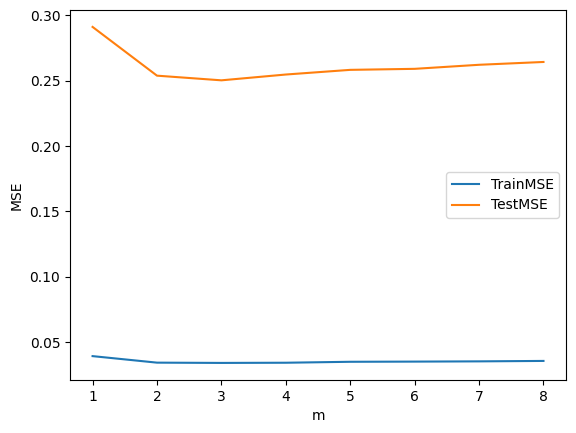

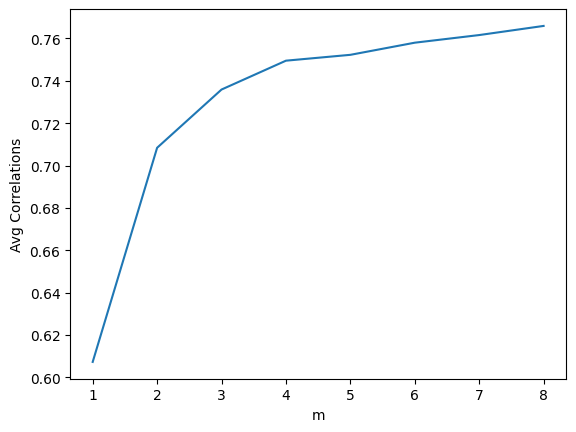

In [44]:
#(e)
import matplotlib.pyplot as plt
d = 8
mses_train = []
mses_test = []
mean_corrs = []

for m in range(1, d+1):
    rf = RandomForestRegressor(n_estimators=100, max_features=m, 
                               random_state=50)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mses_train.append(mse_train)
    mses_test.append(mse_test)
    predictions = []
    for tree in rf.estimators_:
        predictions.append(tree.predict(X_test))
    correlations = []
    for i in range(len(predictions)):
        for j in range(i+1, len(predictions)):
            corr, _ = pearsonr(predictions[i], predictions[j])
            correlations.append(corr)
    mean_corr = np.mean(correlations)
    mean_corrs.append(mean_corr)
    
print("m\tTrain MSE\tTest MSE\tAvg Correlations")
for m, mse_train, mse_test, avg_corr in zip(range(1, d+1), mses_train, 
                                            mses_test, mean_corrs):
    print(f"{m}\t{mse_train:.4f}\t\t{mse_test:.4f}\t\t{avg_corr:.4f}")


plt.figure()
plt.plot(range(1, d+1), mses_train, label='TrainMSE')
plt.plot(range(1, d+1), mses_test, label='TestMSE')
plt.xlabel('m')
plt.ylabel('MSE')
plt.legend()
plt.show()


plt.figure()
plt.plot(range(1, d+1), mean_corrs)
plt.xlabel('m')
plt.ylabel('Avg Correlations')
plt.show()

(f)
The average correlation increases as 𝑚 increases, this is because in a random
 forest, the m determines number of features in each splitting node. When m 
 increases the correlation becomes bigger, it means their predictions increases.

(g)
False, When we choose m, we need to consider the m that corresponds to the 
smallest MSE value, rather than choosing the smallest m value directly.
Only choosing the m value with the smallest MSE will indicate the best fit.